In [35]:
import socket

try:
    s = socket.create_connection(("10.143.61.5", 1433), timeout=3)
    print("✅ SQL Server is reachable!")
except Exception as e:
    print("❌ Connection failed:", e)

✅ SQL Server is reachable!


In [36]:
import pandas as pd
from sqlalchemy import create_engine

username = 'ccna'
password = 'Hamed/.1234'
server_ip = '10.143.61.5'
database = 'TelcoData'

conn_str = (
    f"mssql+pyodbc://{username}:{password}"
    f"@{server_ip}/{database}?driver=ODBC+Driver+18+for+SQL+Server&Encrypt=no"
)

engine = create_engine(conn_str)
# df = pd.read_sql("SELECT TOP 100 * FROM [WA_Fn-UseC_-Telco-Customer-Churn]", engine,)
df = pd.read_sql("SELECT * FROM [WA_Fn-UseC_-Telco-Customer-Churn]", engine,)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [37]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

In [39]:
# Assuming df is already defined with a 'tenure' column containing numeric values
current_date = pd.to_datetime("2025-08-27")

# Make sure tenure column contains numeric values and handle any non-numeric values
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Convert tenure to integer before applying DateOffset
# Using fillna(0) to handle any NaN values that might result from the conversion
df['start_date'] = df['tenure'].fillna(0).apply(lambda x: current_date - pd.DateOffset(months=int(x)))

In [40]:
# df.info()

In [41]:
df['end_date'] = df['Churn'].apply(
    lambda x: current_date if x == 'No' else current_date - pd.DateOffset(months=1)
)

In [42]:
df['Churn'] =df['Churn'].map({'No': 0,'Yes': 1})
# X = data[['Monthly_Purchase_Count', 'Average_Purchase_Amount', 'Visit_Time_code']]

In [43]:
# df['Contract'].unique()

In [44]:
df['Contract'] =df['Contract'].map({'Month-to-month': 0,'One year': 1, 'Two year': 2})

In [45]:
df['gender'] =df['gender'].map({'Female': 0,'Male': 1})

In [46]:
new_tables = df[['Churn','Contract','MonthlyCharges','TotalCharges','gender','tenure','start_date','end_date']].copy()

In [47]:
new_tables

,Churn,Contract,MonthlyCharges,TotalCharges,gender,tenure,start_date,end_date
0,0.0,0.0,29.85,29.85,0.0,1.0,2025-07-27,2025-08-27
1,0.0,1.0,56.95,1889.5,1.0,34.0,2022-10-27,2025-08-27
2,1.0,0.0,53.85,108.15,1.0,2.0,2025-06-27,2025-07-27
3,0.0,1.0,42.3,1840.75,1.0,45.0,2021-11-27,2025-08-27
4,1.0,0.0,70.7,151.65,0.0,2.0,2025-06-27,2025-07-27
...,...,...,...,...,...,...,...,...
7039,0.0,1.0,103.2,7362.9,0.0,72.0,2019-08-27,2025-08-27
7040,0.0,0.0,29.6,346.45,0.0,11.0,2024-09-27,2025-08-27
7041,1.0,0.0,74.4,306.6,1.0,4.0,2025-04-27,2025-07-27
7042,0.0,2.0,105.65,6844.5,1.0,66.0,2020-02-27,2025-08-27


In [48]:
# new_tables.isna().sum()

In [49]:
# new_tables.isna().sum() / new_tables.shape[0] * 100

In [50]:
new_tables.dropna(inplace=True)

In [51]:
# new_tables.isna().sum()

In [52]:
new_tables.dtypes

Churn                    float64
Contract                 float64
MonthlyCharges            object
TotalCharges              object
gender                   float64
tenure                   float64
start_date        datetime64[ns]
end_date          datetime64[ns]
dtype: object

# convert string or object to  float64

In [53]:
new_tables['MonthlyCharges'] = new_tables['MonthlyCharges'].astype(float)
new_tables['TotalCharges'] = pd.to_numeric(new_tables['TotalCharges'], errors='coerce')

# if isinstance(new_tables['TotalCharges'], str) and value.replace('.', '', 1).isdigit():
#     float_value = float(new_tables['TotalCharges']

# new_tables['TotalCharges'] = pd.to_numeric(new_tables['TotalCharges'], errors='coerce')

# m = new_tables['MonthlyCharges']
# float_value = float(m)
# print(float_value)

# new_tables['start_date'] = new_tables['start_date'].astype(float)

In [54]:
from datetime import datetime

# فرض کن ستون تاریخ خرید داری
new_tables['end_date'] = pd.to_datetime(new_tables['end_date'], errors='coerce')

# تاریخ امروز
today = pd.to_datetime('today')

# محاسبه فاصله به روز
new_tables['end_date'] = (today - new_tables['end_date']).dt.days

In [55]:
# فرض کن ستون تاریخ خرید داری
new_tables['start_date'] = pd.to_datetime(new_tables['start_date'], errors='coerce')

# تاریخ امروز
today = pd.to_datetime('today')

# محاسبه فاصله به روز
new_tables['start_date'] = (today - new_tables['start_date']).dt.days

In [56]:
new_tables.dtypes

Churn             float64
Contract          float64
MonthlyCharges    float64
TotalCharges      float64
gender            float64
tenure            float64
start_date          int64
end_date            int64
dtype: object

In [57]:
new_tables.head()

,Churn,Contract,MonthlyCharges,TotalCharges,gender,tenure,start_date,end_date
0,0.0,0.0,29.85,29.85,0.0,1.0,32,1
1,0.0,1.0,56.95,1889.50,1.0,34.0,1036,1
2,1.0,0.0,53.85,108.15,1.0,2.0,62,32
3,0.0,1.0,42.30,1840.75,1.0,45.0,1370,1
4,1.0,0.0,70.70,151.65,0.0,2.0,62,32


In [58]:
new_tables['end_date'].min()

1

In [59]:
new_tables.isna().sum() / new_tables.shape[0] * 100

Churn             0.000000
Contract          0.000000
MonthlyCharges    0.000000
TotalCharges      0.156183
gender            0.000000
tenure            0.000000
start_date        0.000000
end_date          0.000000
dtype: float64

In [60]:
new_tables.dropna(inplace=True)

In [61]:
new_tables.isna().sum() / new_tables.shape[0] * 100

Churn             0.0
Contract          0.0
MonthlyCharges    0.0
TotalCharges      0.0
gender            0.0
tenure            0.0
start_date        0.0
end_date          0.0
dtype: float64

In [62]:
new_tables.isna().sum()

Churn             0
Contract          0
MonthlyCharges    0
TotalCharges      0
gender            0
tenure            0
start_date        0
end_date          0
dtype: int64

In [63]:
print(new_tables.dtypes)

Churn             float64
Contract          float64
MonthlyCharges    float64
TotalCharges      float64
gender            float64
tenure            float64
start_date          int64
end_date            int64
dtype: object


In [64]:
X_scaled = StandardScaler().fit_transform(new_tables)

In [77]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In [66]:
iso = Isomap(n_neighbors=10,n_components=2)
X_2d_iso = iso.fit_transform(X_scaled)

C:\Users\hamed\anaconda3\envs\Machin_learning\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 11 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\hamed\anaconda3\envs\Machin_learning\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\hamed\anaconda3\envs\Machin_learning\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\hamed\anaconda3\envs\Machin_learning\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and d

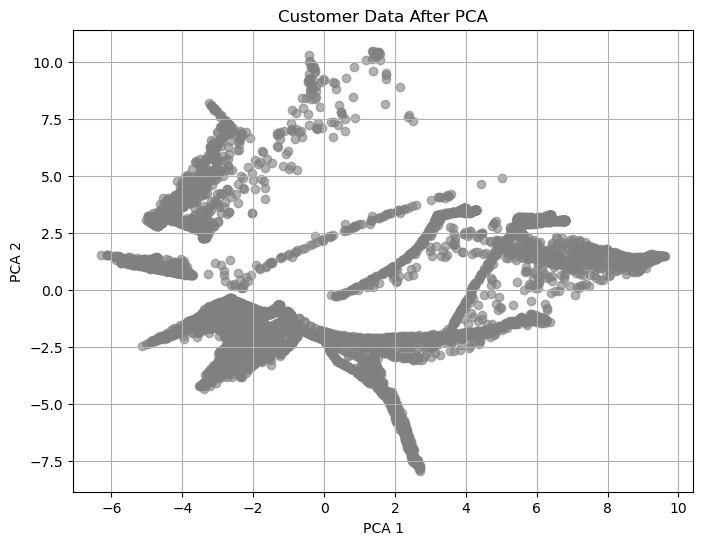

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(X_2d_iso[:,0], X_2d_iso[:,1], color='gray', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Data After PCA')
plt.grid(True)
plt.show()

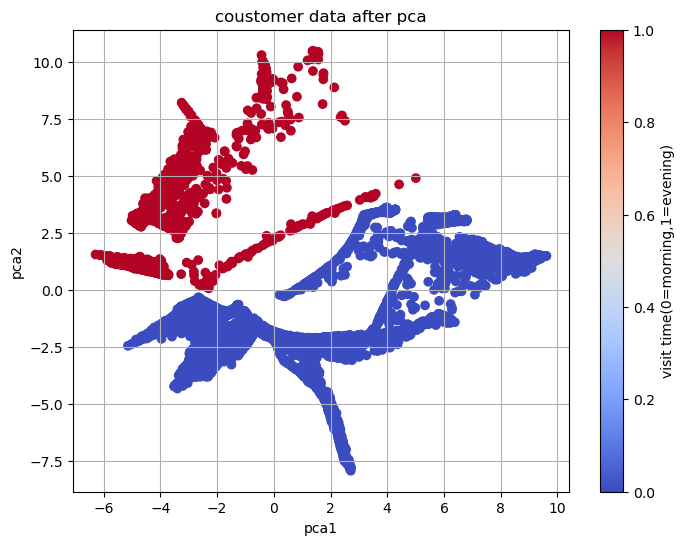

In [76]:
# plt.subplot(223)
# plt.scatter(x=X_2d_iso[:, 0],
#             y=X_2d_iso[:, 1], c=y);
# plt.title('Isomap')



plt.figure(figsize=(8,6))
plt.scatter(X_2d_iso[:,0], X_2d_iso[:,1],c=new_tables['Churn'], cmap='coolwarm')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('coustomer data after pca')
plt.colorbar(label ='visit time(0=morning,1=evening)')
plt.grid(True)
plt.show()

In [71]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

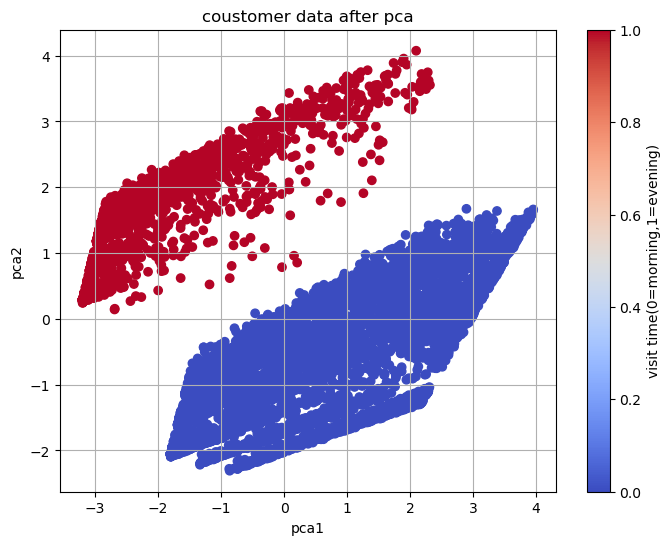

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],c=new_tables['Churn'], cmap='coolwarm')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('coustomer data after pca')
plt.colorbar(label ='visit time(0=morning,1=evening)')
plt.grid(True)
plt.show()

In [79]:
tsne = TSNE(n_components=2)
X_2d_tsne = tsne.fit_transform(X_scaled)

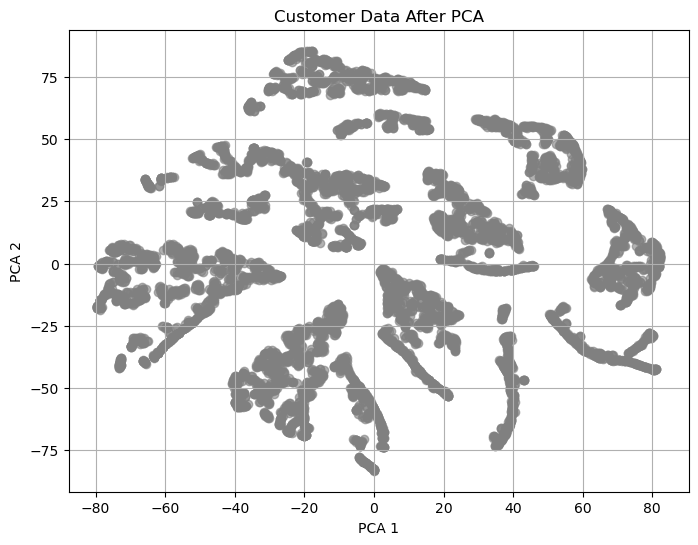

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(X_2d_tsne[:,0], X_2d_tsne[:,1], color='gray', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Data After PCA')
plt.grid(True)
plt.show()

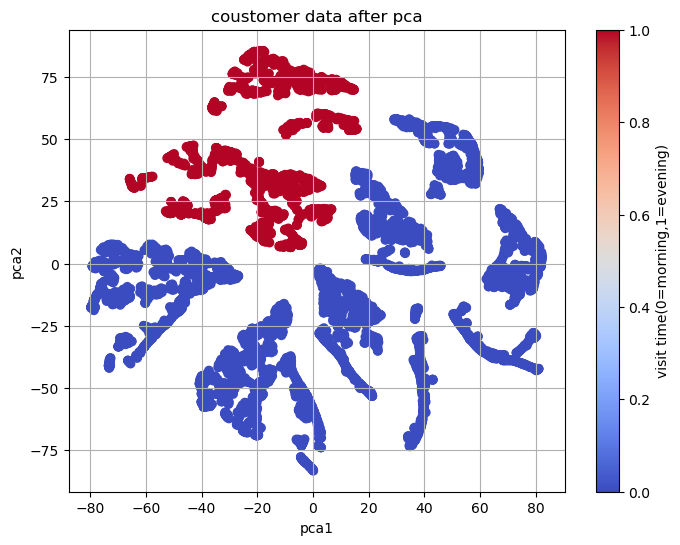

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(X_2d_tsne[:,0], X_2d_tsne[:,1],c=new_tables['Churn'], cmap='coolwarm')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('coustomer data after pca')
plt.colorbar(label ='visit time(0=morning,1=evening)')
plt.grid(True)
plt.show()

In [88]:
from sklearn.manifold import trustworthiness

score = trustworthiness(new_tables, X_2d_iso, n_neighbors=5)
print(score)

0.958152080077796


In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans  = KMeans(n_clusters=3, random_state=11).fit_predict(X_pca) 

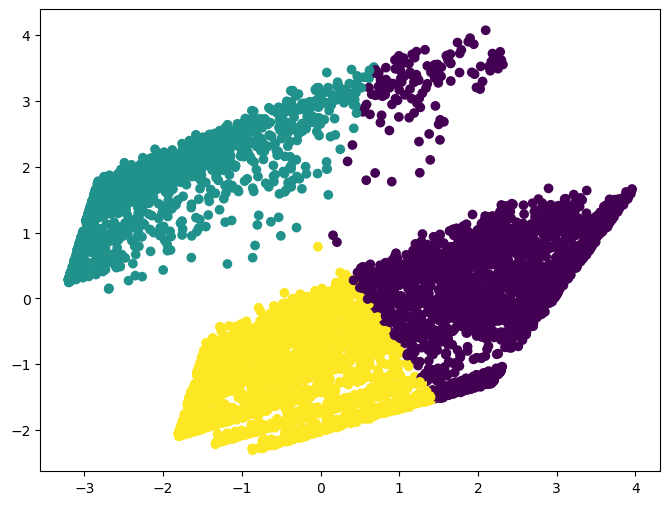

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans, cmap= 'viridis')

In [40]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS

In [41]:
k = KMeans(n_clusters=3, random_state=11).fit_predict(X_pca)
S = SpectralClustering(n_clusters=2, random_state=11).fit_predict(X_pca)
D = DBSCAN(eps=0.2, min_samples=3).fit_predict(X_pca)
A = AgglomerativeClustering(n_clusters=2).fit_predict(X_pca)
G = GaussianMixture(n_components=2).fit_predict(X_pca)
M = MeanShift(bandwidth=2).fit_predict(X_pca)
B = Birch(n_clusters=2).fit_predict(X_pca)
O = OPTICS(eps=0.2, min_samples=3).fit_predict(X_pca)

C:\Users\hamed\anaconda3\envs\Machin_learning\Lib\site-packages\sklearn\cluster\_optics.py:1084: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


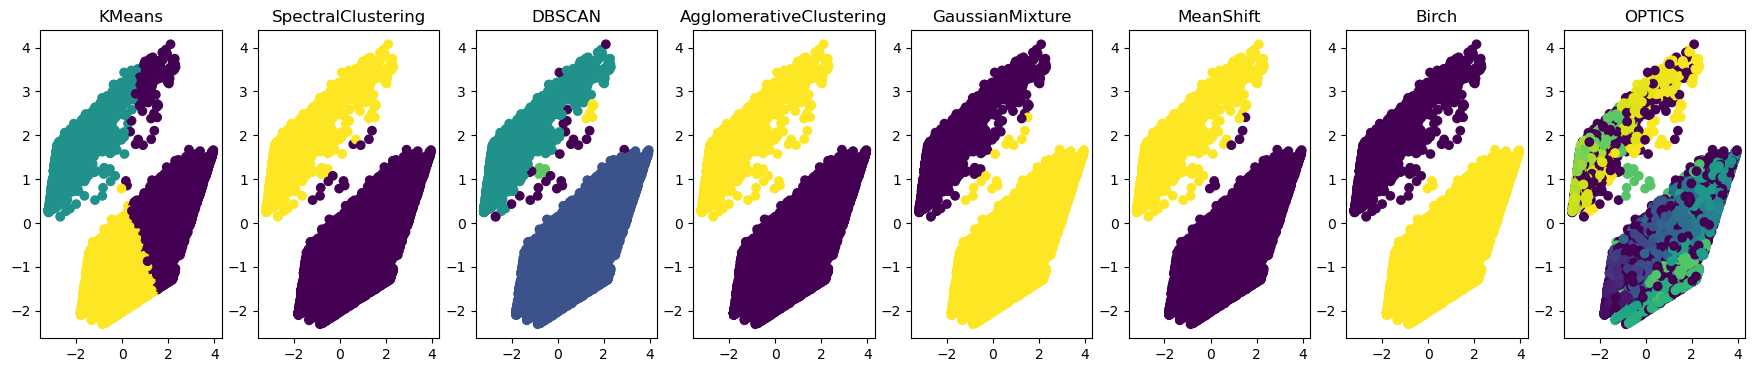

In [42]:
plt.figure(figsize=(22,4))
plt.subplot(181)
plt.title('KMeans')
plt.scatter(X_pca[:,0], X_pca[:,1], c=k, cmap= 'viridis')

plt.subplot(182)
plt.title('SpectralClustering')
plt.scatter(X_pca[:,0], X_pca[:,1], c=S, cmap= 'viridis')

plt.subplot(183)
plt.title('DBSCAN')
plt.scatter(X_pca[:,0], X_pca[:,1], c=D, cmap= 'viridis')

plt.subplot(184)
plt.title('AgglomerativeClustering')
plt.scatter(X_pca[:,0], X_pca[:,1], c=A, cmap= 'viridis')

plt.subplot(185)
plt.title('GaussianMixture')
plt.scatter(X_pca[:,0], X_pca[:,1], c=G, cmap= 'viridis')

plt.subplot(186)
plt.title('MeanShift')
plt.scatter(X_pca[:,0], X_pca[:,1], c=M, cmap= 'viridis')

plt.subplot(187)
plt.title('Birch')
plt.scatter(X_pca[:,0], X_pca[:,1], c=B, cmap= 'viridis')

plt.subplot(188)
plt.title('OPTICS')
plt.scatter(X_pca[:,0], X_pca[:,1], c=O, cmap= 'viridis')

In [43]:
new_tables['Cluster'] = M

In [44]:
new_tables.groupby('Cluster')[['Churn', 'Contract', 'end_date', 'MonthlyCharges','TotalCharges','gender','tenure']].mean()

,Churn,Contract,end_date,MonthlyCharges,TotalCharges,gender,tenure
Cluster,,,,,,,
0,0.001354,0.888588,1.041973,61.278743,2555.528211,0.507350,37.685106
1,1.000000,0.133190,32.000000,74.570301,1527.437084,0.497315,17.807734


In [45]:
# new_tables.head()

In [46]:
from sklearn.metrics import adjusted_mutual_info_score

In [47]:
score1 = adjusted_mutual_info_score(new_tables['Churn'],k)
score2 = adjusted_mutual_info_score(new_tables['Churn'],S)
score3 = adjusted_mutual_info_score(new_tables['Churn'],D)
score4 = adjusted_mutual_info_score(new_tables['Churn'],A)
score5 = adjusted_mutual_info_score(new_tables['Churn'],G)
score6 = adjusted_mutual_info_score(new_tables['Churn'],M)
score7 = adjusted_mutual_info_score(new_tables['Churn'],B)
score8 = adjusted_mutual_info_score(new_tables['Churn'],O)

In [48]:
print(score1,
score2,
score3,
score4,
score5,
score6,
score7,
score8)

0.6076709474089861 0.9806488750611505 0.97369294057074 1.0 0.9766265947669936 0.9877906375521117 0.9941451886394995 0.10976465800060393


In [49]:
# plt.scatter(X_pca[:,0], X_pca[:,1],c=M, cmap='Set1')

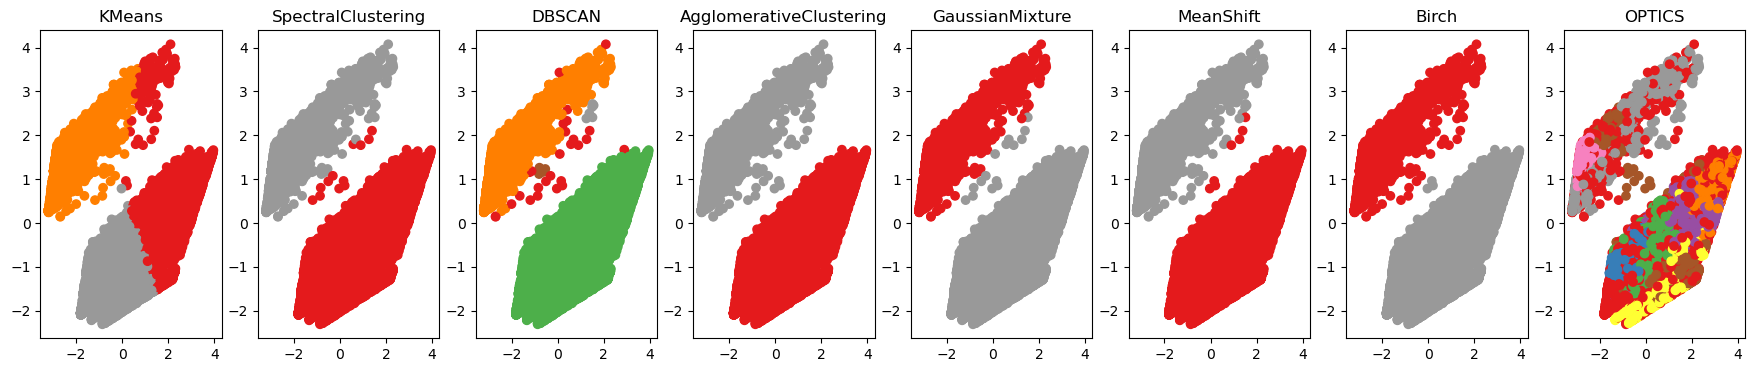

In [50]:
plt.figure(figsize=(22,4))
plt.subplot(181)
plt.title('KMeans')
plt.scatter(X_pca[:,0], X_pca[:,1], c=k, cmap= 'Set1')

plt.subplot(182)
plt.title('SpectralClustering')
plt.scatter(X_pca[:,0], X_pca[:,1], c=S, cmap= 'Set1')

plt.subplot(183)
plt.title('DBSCAN')
plt.scatter(X_pca[:,0], X_pca[:,1], c=D, cmap= 'Set1')

plt.subplot(184)
plt.title('AgglomerativeClustering')
plt.scatter(X_pca[:,0], X_pca[:,1], c=A, cmap= 'Set1')

plt.subplot(185)
plt.title('GaussianMixture')
plt.scatter(X_pca[:,0], X_pca[:,1], c=G, cmap= 'Set1')

plt.subplot(186)
plt.title('MeanShift')
plt.scatter(X_pca[:,0], X_pca[:,1], c=M, cmap= 'Set1')

plt.subplot(187)
plt.title('Birch')
plt.scatter(X_pca[:,0], X_pca[:,1], c=B, cmap= 'Set1')

plt.subplot(188)
plt.title('OPTICS')
plt.scatter(X_pca[:,0], X_pca[:,1], c=O, cmap= 'Set1')

In [51]:
import numpy as np
np.unique(O)

array([  -1,    0,    1, ..., 1073, 1074, 1075])

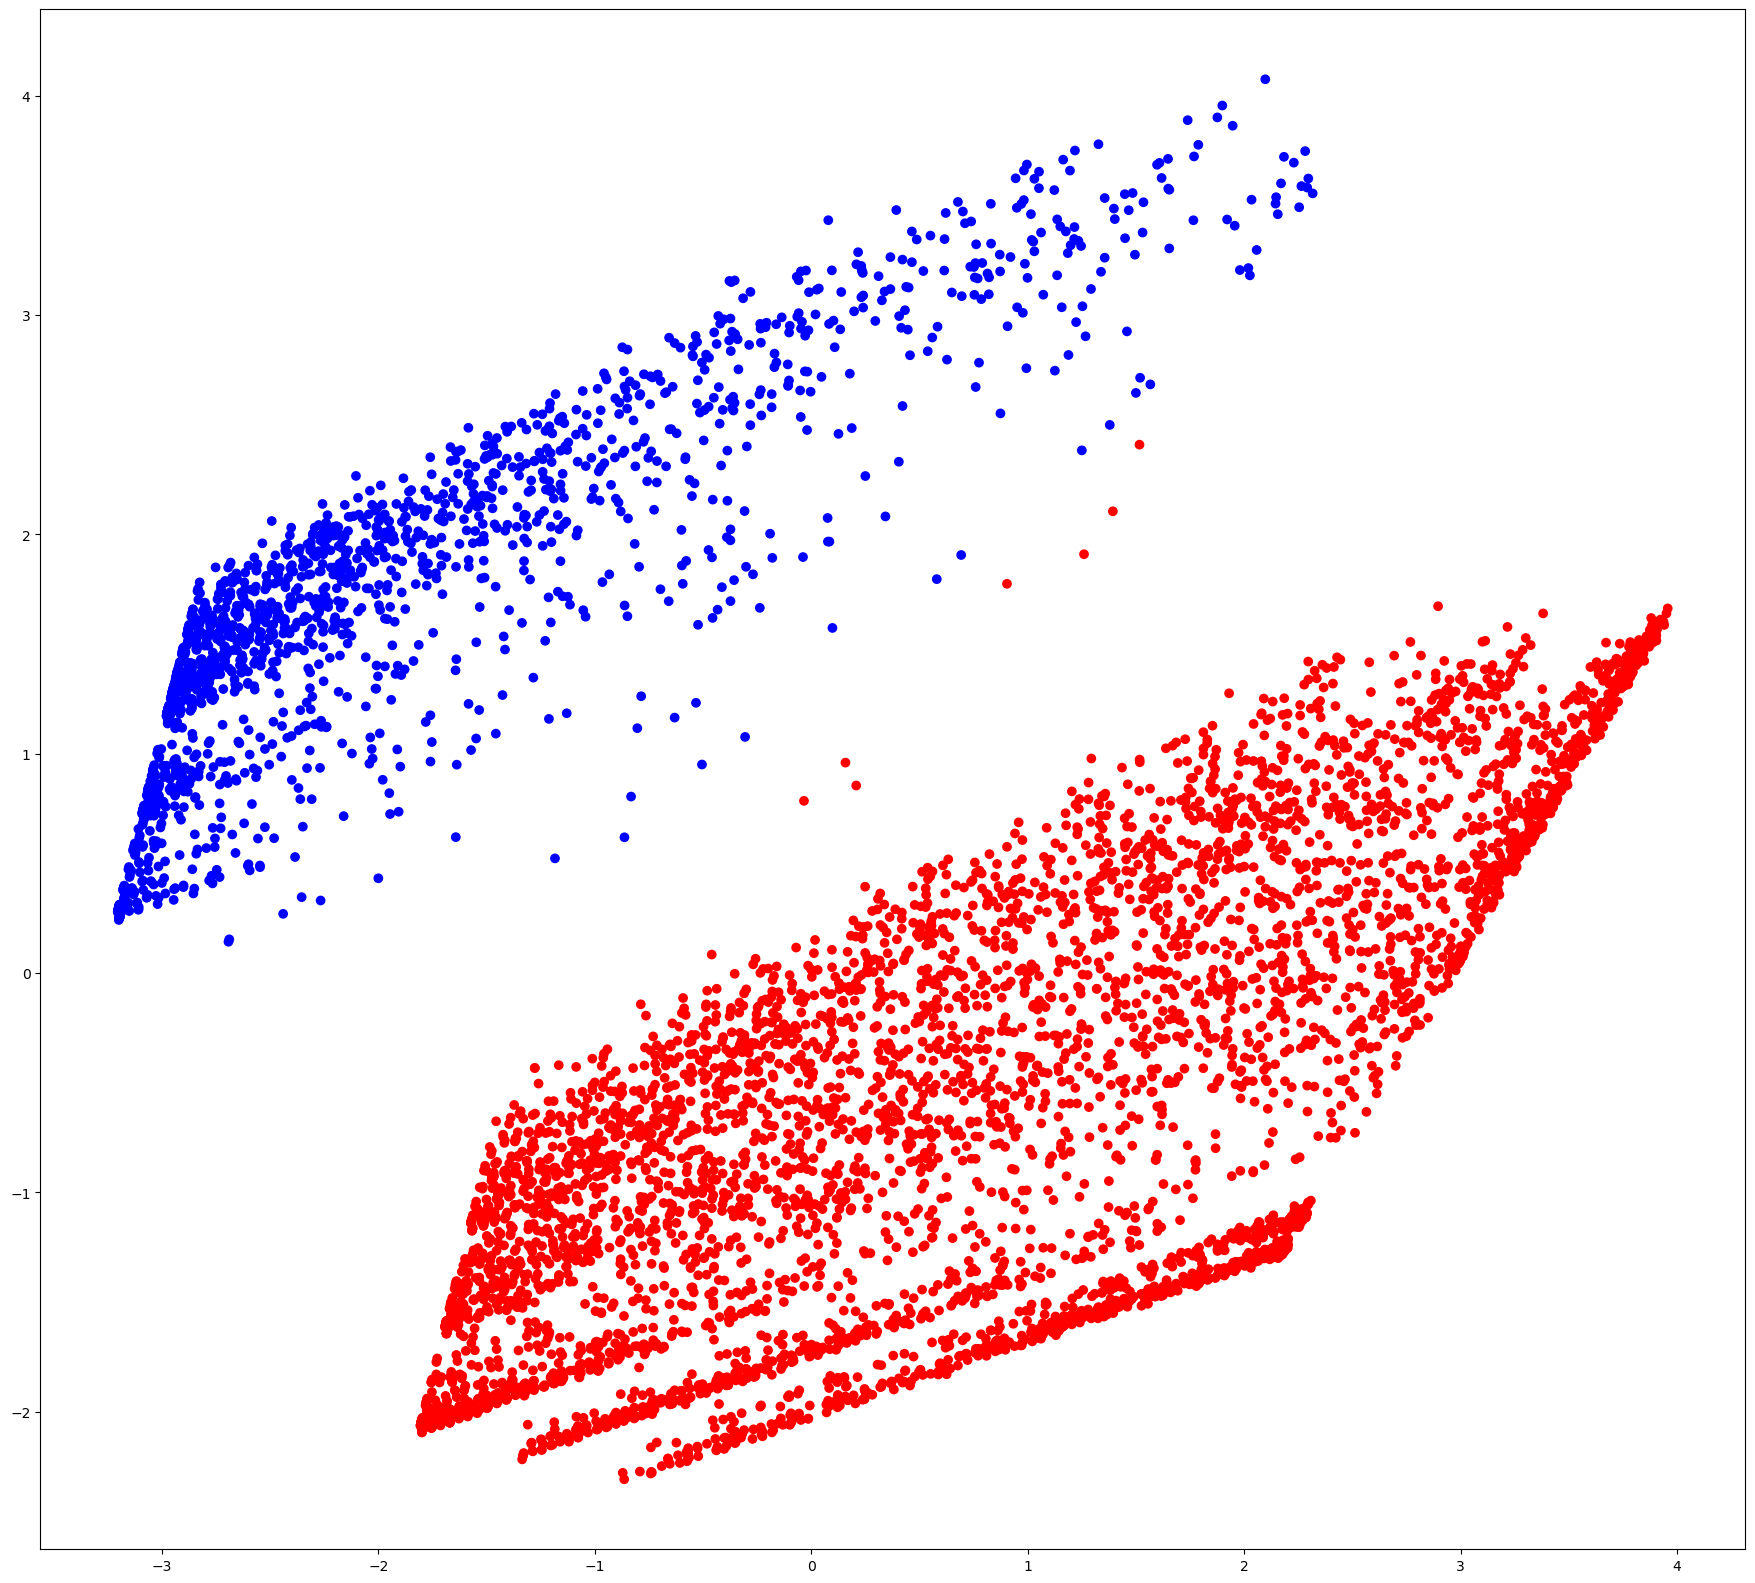

In [52]:
plt.figure(figsize=(22,20))
colors = ['red', 'blue', 'gray']  # خوشه 0، خوشه 1، نویز
plt.scatter(X_pca[:,0], X_pca[:,1], c=[colors[i] if i!=-1 else 'gray' for i in M])

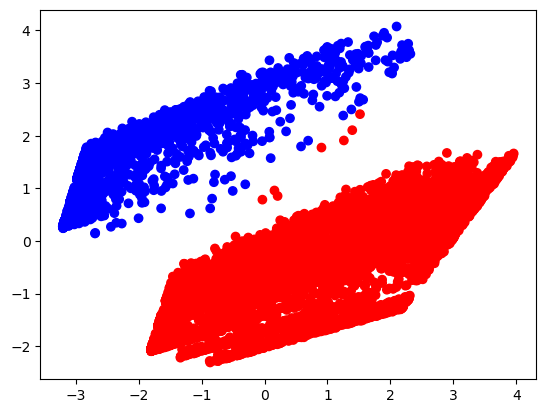

In [53]:
colors = []
for i in M:
    if i == -1:
        colors.append('gray')  # نویز
    elif i == 0:
        colors.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('green')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)

In [54]:
grouped = new_tables.groupby('M').agg({
    'Churn': 'mean',
    'Contract':'mean',
    'MonthlyCharges':'mean',
    'TotalCharges':'mean',
    'gender':'mean',
    'tenure':'mean',
    'start_date':'mean',
    'end_date':'mean'
    
}).reset_index()
print(grouped)

KeyError: 'M'

In [ ]:
new_tables['segment'] = new_tables['S'].map({
    0: 'Loyal and valuable customers',
    1: 'Lost customers'
})

In [ ]:
import numpy as np

In [ ]:
# new_tables['segment'] = np.where(new_tables['MonthlyCharges'] >72.000000 ,'loyal_coustomer','non_loyal_coustomer')

In [ ]:
# new_tables['segment'] = np.where(new_tables['TotalCharges'] >2000.000000 ,'loyal_coustomer','non_loyal_coustomer')

In [ ]:
# colors= new_tables['segment'].map({
#     'loyal_coustomer':'green',
#     'non_loyal_coustomer':'gray',
    
# })

new_tables['S'] = S
colors = new_tables['S'].map({
    0: 'green',
    1: 'gray'
})

In [ ]:
plt.figure(figsize=(26,12))
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title("'green' = Loyal and valuable customers 'gray' = Lost customers")
plt.grid(True)
plt.show()

In [ ]:
# print(new_tables.select_dtypes(include='number').nunique())

In [ ]:
# new_tables['Cluster'].unique()

In [ ]:
# new_tables.head()

In [ ]:
# new_tables['end'] = new_tables['Churn'].apply(
#     lambda x: current_date if x == 0 else current_date - pd.DateOffset(months=1)
# )